## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.

Let's load the data:

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [33]:
url= 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [34]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv(url, usecols=columns)
df.reviews_per_month = df.reviews_per_month.fillna(0)

* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1

In [35]:
df.price = np.log1p(df.price)

In [36]:
y = df.price

In [37]:
X = df.drop('price',1)
X.columns

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

Now, use `DictVectorizer` to turn train and validation into matrices:

In [41]:
from sklearn.feature_extraction import DictVectorizer

In [42]:
train_dict = X_train.to_dict(orient='records')

In [43]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
               sparse=False)

In [44]:
X_train1 = dv.transform(train_dict)

In [45]:
X_train1.shape

(29337, 15)

In [46]:
val_dict = X_val.to_dict(orient='records')
X_val1 = dv.transform(val_dict)
X_val1.shape

(9779, 15)

## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
dt = DecisionTreeRegressor(max_depth=1)

In [49]:
dt.fit(X_train1, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [50]:
from sklearn.tree import export_text

In [51]:
print(export_text(dt,feature_names=dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf = RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)

In [53]:
rf.fit(X_train1, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [54]:
pred = rf.predict(X_val1)

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
rmse = sqrt(mean_squared_error(y_val,pred))
rmse

0.460888788095762

What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset

In [57]:
import numpy as np

In [61]:
n_est = np.linspace(10, 200, 20)
n_est = [int(i) for i in n_est]


In [67]:
resrsme = []
for i in n_est:
  rf = RandomForestRegressor(n_estimators=i,random_state=1,n_jobs=-1)
  rf.fit(X_train1, y_train)
  pred = rf.predict(X_val1)
  rmse = sqrt(mean_squared_error(y_val,pred))
  resrsme.append(rmse)
  print(i,' ',rmse)




10   0.460888788095762
20   0.44744055425901735
30   0.44440015830200136
40   0.44281711871165336
50   0.44176815762157207
60   0.44125165338475053
70   0.44064455072014125
80   0.440740830263047
90   0.4402749020311618
100   0.4397631903425602
110   0.4393128261208466
120   0.43912990819267467
130   0.4392796575512702
140   0.4391514983746916
150   0.43902892484355854
160   0.4388423640549406
170   0.43874605090230334
180   0.4388528948224223
190   0.4387907435385231
200   0.4387871286025359


In [64]:
import matplotlib.pyplot as plt

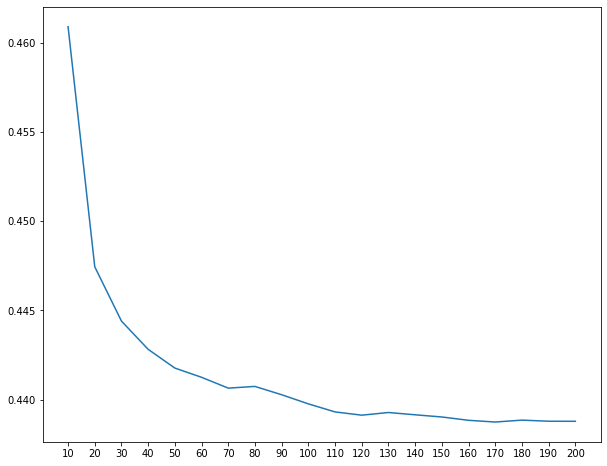

In [70]:
plt.figure(figsize=(10, 8))
plt.plot(n_est,resrsme, linestyle='solid', label='rmse')
plt.xticks(np.linspace(10,200 , 20))
plt.show()


After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`

In [71]:
maxd = [10, 15, 20, 25]
for i in maxd:
  for j in n_est:
    rf = RandomForestRegressor(n_estimators=j,max_depth=i,random_state=1,n_jobs=-1)
    rf.fit(X_train1, y_train)
    pred = rf.predict(X_val1)
    rmse = sqrt(mean_squared_error(y_val,pred))
    resrsme.append(rmse)
    print('max depth-',i,' ','n_estimators-',j,' ','rmse',rmse)

max depth- 10   n_estimators- 10   rmse 0.44520997451725497
max depth- 10   n_estimators- 20   rmse 0.44188768969228903
max depth- 10   n_estimators- 30   rmse 0.4412072430403244
max depth- 10   n_estimators- 40   rmse 0.441302539566751
max depth- 10   n_estimators- 50   rmse 0.44094661033788907
max depth- 10   n_estimators- 60   rmse 0.4410194069419074
max depth- 10   n_estimators- 70   rmse 0.4408176000010481
max depth- 10   n_estimators- 80   rmse 0.44067863323218287
max depth- 10   n_estimators- 90   rmse 0.44039309045805686
max depth- 10   n_estimators- 100   rmse 0.44016087713810426
max depth- 10   n_estimators- 110   rmse 0.4401070986887385
max depth- 10   n_estimators- 120   rmse 0.43988415134762726
max depth- 10   n_estimators- 130   rmse 0.43992211198265757
max depth- 10   n_estimators- 140   rmse 0.43991391462947493
max depth- 10   n_estimators- 150   rmse 0.4397403211692405
max depth- 10   n_estimators- 160   rmse 0.4396909000703574
max depth- 10   n_estimators- 170   rmse 

What's the best `max_depth`:

* 10
* 15
* 20
* 25

Bonus question (not graded):

Will the answer be different if we change the seed for the model?

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importances_` field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model

What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	
* `longitude`
* `latitude`

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` first to `0.1` and then to `0.01`

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* 0.01

## Submit the results


Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline


The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.

